In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/selinaydin/PycharmProjects/e-commerce_comments/source_doc/e-ticaret_urun_yorumlari.csv", delimiter=";")

In [4]:
%matplotlib inline 

/var/folders/p1/1dwyrw9j2dg5n7m_bh0p0xlh0000gn/T/ipykernel_29572/2438233322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Durum"], palette=["red", "green"])
/var/folders/p1/1dwyrw9j2dg5n7m_bh0p0xlh0000gn/T/ipykernel_29572/2438233322.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df["Durum"], palette=["red", "green"])


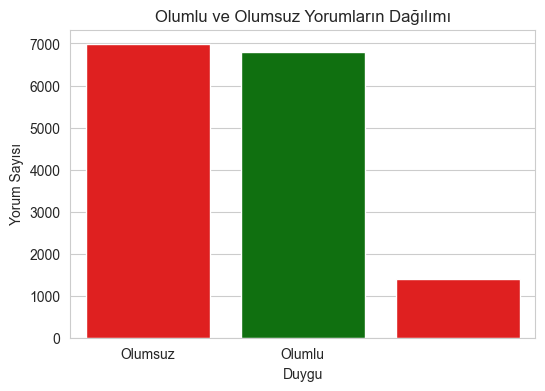

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Durum"], palette=["red", "green"])
plt.xticks(ticks=[0, 1], labels=["Olumsuz", "Olumlu"])
plt.xlabel("Duygu")
plt.ylabel("Yorum Sayısı")
plt.title("Olumlu ve Olumsuz Yorumların Dağılımı")
plt.show()

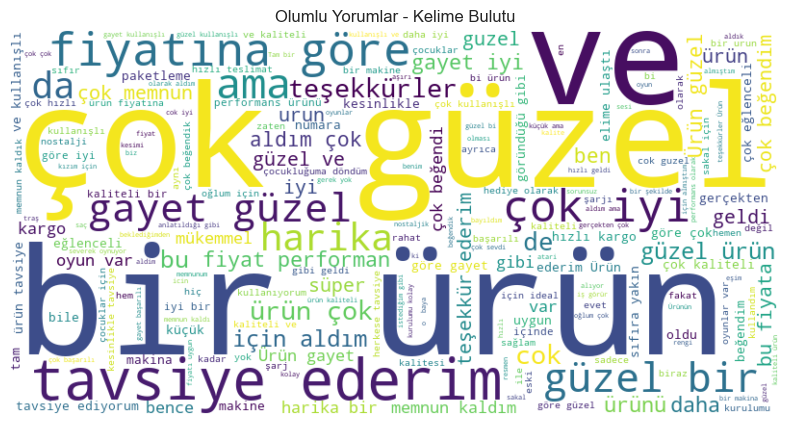

In [6]:
positive_text = " ".join(df[df["Durum"] == 1]["Metin"].astype(str))
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Olumlu Yorumlar - Kelime Bulutu")
plt.show()

In [7]:
negative_text = " ".join(df[df["Durum"] == 0]["Metin"].astype(str))
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

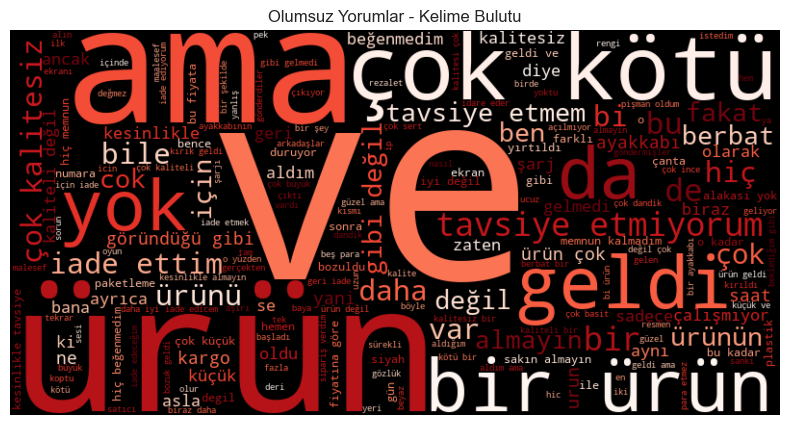

In [8]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Olumsuz Yorumlar - Kelime Bulutu")
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)  
X = vectorizer.fit_transform(df["Metin"])

y = df["Durum"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim verisi boyutu: {X_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}")

Eğitim verisi boyutu: (12136, 5000)
Test verisi boyutu: (3034, 5000)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("📌 Lojistik Regresyon Sonuçları:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\n📌 Naive Bayes Sonuçları:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

📌 Lojistik Regresyon Sonuçları:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1370
           1       0.91      0.94      0.92      1384
           2       0.68      0.40      0.51       280

    accuracy                           0.89      3034
   macro avg       0.83      0.76      0.78      3034
weighted avg       0.88      0.89      0.88      3034

Accuracy: 0.8902439024390244

📌 Naive Bayes Sonuçları:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1370
           1       0.85      0.96      0.90      1384
           2       0.79      0.11      0.19       280

    accuracy                           0.87      3034
   macro avg       0.85      0.67      0.67      3034
weighted avg       0.87      0.87      0.85      3034

Accuracy: 0.8747528015820699


In [12]:
new_review = ["Ürün gerçekten çok kötü, hiç beğenmedim. Tavsiye etmiyorum."]

new_review_tfidf = vectorizer.transform(new_review)


log_prediction = log_model.predict(new_review_tfidf)[0]
nb_prediction = nb_model.predict(new_review_tfidf)[0]

print(f"📌 Lojistik Regresyon Tahmini: {'Olumlu' if log_prediction == 1 else 'Olumsuz'}")
print(f"📌 Naive Bayes Tahmini: {'Olumlu' if nb_prediction == 1 else 'Olumsuz'}")


📌 Lojistik Regresyon Tahmini: Olumsuz
📌 Naive Bayes Tahmini: Olumsuz
